Hallar las ecuaciones del péndulo doble es un poco más desafiante. No obstante, ateniéndose fielmente a la metodología, describiendo con precisión las variables, los grados de libertad, las restricciones y contabilizando las fuerzas, identificando la función de Lagrange llegaremos a su deducción. Los cálculos son un tediosos y los haremos con Sympy, luego usaremos NumPy y SciPy para resolver numéricamente esas ecuaciones y por último usamos Matplotlib para graficar las soluciones y hacer animaciones del movimiento. 

In [1]:
from sympy import *
init_printing()

Suponemos el movimiento confinado a un plano, tenemos dos coordenadas cartesianas por cada masa. En principio estas coordenadas están  en $ℝ^4$, hay 4 <b>grados de libertad</b>. Pero tenemos dos <b>restricciones</b>, la distancia de la masa $m_1$ al origen y de las dos masas entre si. Por lo tanto quedan 4-2=2 grados de libertad. Podemos utilizar los dos ángulos marcados en la figura como <b> coordenadas Lagrangianas </b> 

La fuerza de la tensión que mantiene a la masa $m_1$ a una distancia fija del origen la debemos considerar una fuerza externa, puesto que nuestro sistema tiene dos puntos materiales, las masas $m_1$ y $m_2$, el origen no es un punto material de nuestro sistema. La fuerza de la restricción que actua manteniendo  a $m_1$ y $m_2$ a una distancia fija  es inercial, por consiguiente satisface el principio de acción y reacción.  

Las coordenadas Lagrangianas y cartesianas estan relacionadas por las fórmulas debajo.

In [3]:
t=symbols('t',real=True)
l1,l2,m1,m2,g=symbols('l_1,l_2,m_1,m_2,g',positive=True)
theta1=Function('theta_1')(t)
theta2=Function('theta_2')(t)
x1=l1*sin(theta1)
y1=-l1*cos(theta1)
x2=x1+l2*sin(theta2)
y2=y1-l2*cos(theta2)


Introducimos vectores posicion

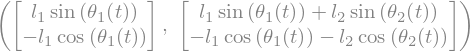

In [4]:
X1=Matrix([x1,y1])
X2=Matrix([x2,y2])
X1,X2

Sobre cada masa $m_i$, $i=1,2$, actua la fuerza activa de la gravedad 
$$\vec{F}_i=(0,-m_ig)$$
que tiene potencial
$$U_i=m_igy_i.$$
Luego
$$U=U_1+U_2=m_1gy_1+m_2gy_2$$
es un potencial para el sistema. Así
$$L=\frac{m_1}{2}\left(\dot{x}_1^2+\dot{y}_1^2\right)+\frac{m_2}{2}\left(\dot{x}_2^2+\dot{y}_2^2)\right)-m_1gy_1-m_2gy_2$$
es la función de Lagrange. Introduzcamos este Lagrangiana en nuestra sesión de Sympy, observar que como las posiciones ya las expresamos en coordenadas Lagrangianas el Lagrangiana quedará expresado de esta forma.

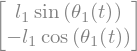

In [5]:
X1

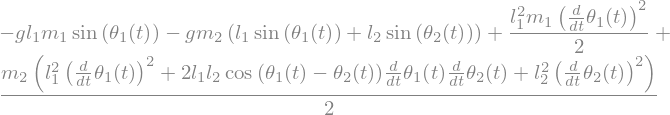

In [6]:
U=m1*g*x1+m2*g*x2
V1=X1.diff(t)
V2=X2.diff(t)
T=m1*V1.dot(V1)/2+m2*V2.dot(V2)/2
L=(T-U).simplify()
L

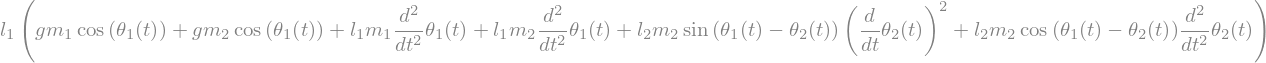

In [7]:
eq1=((L.diff(theta1.diff(t))).diff(t)-L.diff(theta1)).simplify()
eq1

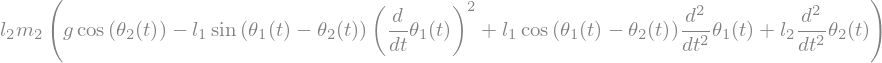

In [8]:
eq2=((L.diff(theta2.diff(t))).diff(t)-L.diff(theta2)).simplify()
eq2

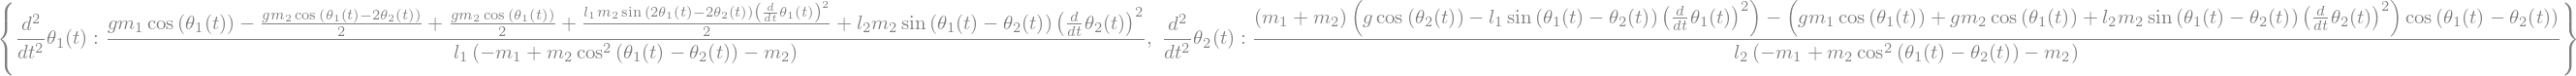

In [9]:
sol=solve([eq1,eq2],[theta1.diff(t,2),theta2.diff(t,2)])
sol

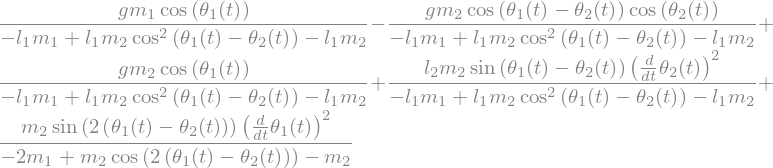

In [10]:
sol[theta1.diff(t,2)].trigsimp()

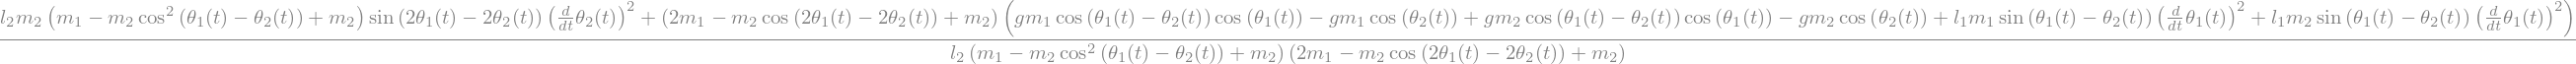

In [12]:
sol[theta2.diff(t,2)].trigsimp().simplify()


Simmplificando a mano las expresiones obtenidas por sympy llegamos a las \textbf{ecuaciones del péndulo doble}

$\theta_1''=-\frac{
g m_{1} \sin{\theta_{1}} + \frac{g m_{2}}{2} \sin{\left (\theta_{1}{} - 2 \theta_{2}{} \right )} + \frac{g m_{2}}{2} \sin{\theta_{1}} + \frac{l_{1} m_{2}}{2} \sin{\left (2 \theta_{1}{} - 2 \theta_{2}{} \right )} \left(\theta_{1}'\right)^{2} + l_{2} m_{2} \sin{\left (\theta_{1}{} - \theta_{2}{} \right )} \left(\theta_{2}'\right)^{2}
}{l_{1} \left(m_{1} + m_{2} \sin^{2}{\left (\theta_{1}{} - \theta_{2}{} \right )}\right)} 
$

$\theta_2''=\frac{\sin(\theta_1-\theta_2)
\left(g (m_{1}+m_2) \cos{ \theta_{1}} 
+ l_{1} (m_{1}+m_{2}) \left(\theta_1'\right)^{2}+ l_{2} m_{2} \cos{\left (\theta_{1}{} - \theta_{2}{} \right )} \left(\theta_2'\right)^{2}\right)
}{l_{2} \left(m_{1} + m_{2} \sin^{2}{\left (\theta_{1}{} - \theta_{2}{} \right )}\right)} 
$

Ahora usamos NumPy y SciPy para resolver numéricamente las ecuaciones. 

In [11]:
import numpy as np
from scipy.integrate import odeint 


In [12]:
def PendDoble(y,t,g,l1,l2,m1,m2):
    theta1,theta2,d_theta1,d_theta2=y
    dydt1=d_theta1
    dydt2=d_theta2
    D=(m1 + m2*np.sin(theta1 - theta2)**2)
    dydt3=-(g*m1*np.sin(theta1) + g*m2*np.sin(theta1 - 2*theta2)/2 + g*m2*np.sin(theta1)/2\
            + l1*m2*np.sin(2*theta1 - 2*theta2)*d_theta1**2/2\
                + l2*m2*np.sin(theta1 - theta2)*d_theta2**2)/(l1*D)
    dydt4=np.sin(theta1 - theta2)*(g*(m1+m2)*np.cos(theta1)\
                +l1*(m1+m2)*d_theta1**2+l2*m2*np.cos(theta1-theta2)*d_theta2**2)/(l2*D)
    dydt = [dydt1,dydt2,dydt3,dydt4]
    return dydt

In [15]:
g,l1,l2,m1,m2=1,1,1,1,1
y0=[np.pi-.1,np.pi-.5,0,0]
t = np.linspace(0, 10*np.pi, 500)
sol = odeint(PendDoble, y0, t, args=(g,l1,l2,m1,m2))
np.shape(sol)

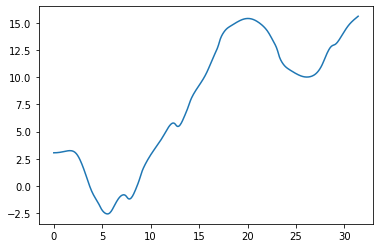

In [16]:
import matplotlib.pyplot as plt
plt.plot(t,sol[:,0])
plt.show()

In [17]:
import matplotlib.animation as animation
%matplotlib qt

In [18]:
theta1=sol[:,0]
theta2=sol[:,1]
x1=l1*np.sin(theta1)
y1=-l1*np.cos(theta1)
x2=x1+l2*np.sin(theta2)
y2=y1-l2*np.cos(theta2)
dt=t[1]-t[0]


fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-3, 3), ylim=(-3, 3))
ax.set_aspect('equal')
#ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'tiempo = %.1fs'
time_text = ax.text(0.1,0.1, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y1)),
                              interval=25, blit=True, init_func=init)

plt.show()
#ani.save("PendDoble.mp4")